# Analisys and predict student pass

## 1. Формулировка задачи и целей анализа

Определить факторы, влияющие на успешную сдачу экзамена студентами, и построить модель, способную прогнозировать вероятность получения зачёта на основе академических и поведенческих признаков.



1.1 Цели анализа

- Исследовательский анализ данных (EDA)

- Проверить распределение признаков и сбалансированность классов (Pass / Fail).

- Выявить зависимость между посещаемостью, успеваемостью, временем на учебу и итоговым результатом.

- Проверка гипотез

- Проверить, какие факторы статистически значимо влияют на вероятность сдачи экзамена.

- Построение модели классификации

- Разработать интерпретируемую модель (логистическая регрессия) для прогнозирования вероятности сдачи.

- Интерпретация результатов

- Определить, какие признаки наиболее важны для прогноза и каким образом они влияют на результат.

- Формулировка практических рекомендаций

- На основе анализа предложить меры для повышения успеваемости студентов и раннего выявления группы риска.

## 2. Определение метрик и критериев успеха

2.1. Метрики классификации

- Accuracy (точность) — доля правильных предсказаний (сдавших и не сдавших).

- Precision (точность предсказаний класса «Pass») — насколько верны предсказания о том, что студент сдаст экзамен.

- Recall (полнота класса «Pass») — насколько хорошо модель выявляет всех студентов, которые реально сдают экзамен.

- F1-score — гармоническое среднее precision и recall, учитывающее баланс между ними.

- ROC-AUC — общая способность модели различать классы «Pass» и «Fail», независимо от выбранного порога.

2.2. Критерии успеха

- Минимальная точность (Accuracy): ≥ 0.8

- F1-score для класса «Pass»: ≥ 0.75

- ROC-AUC: ≥ 0.8 — подтверждает способность модели различать сдавших и не сдавших.

Модель считается успешной, если одновременно достигает удовлетворительных значений указанных метрик и позволяет интерпретировать влияние ключевых признаков на итоговый результат.

## 3. Загрузка и первичный осмотр данных

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ishanjha100/student-passfail-data")

print("Path to dataset files:", path)

c:\Users\user\CANDLES\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\ishanjha100\student-passfail-data\versions\1


In [2]:
import pandas as pd

# C:\Users\user\.cache\kagglehub\datasets\ishanjha100\student-passfail-data\versions\1

# Use the full path to your data file
file_path = "C:/Users/user/.cache/kagglehub/datasets/ishanjha100/student-passfail-data/versions/1/Pass-Fail Data.csv" 

# Read the data into a DataFrame
df_origin = pd.read_csv(file_path)

In [3]:
# create a copy for work
df = df_origin.copy()

In [4]:
df.head(5)

,student_id,attendance_pct,homework_pct,midterm_score,study_hours_per_week,pass
0,1,95,92,88,12,1
1,2,88,85,79,10,1
2,3,60,55,58,4,0
3,4,72,70,65,6,1
4,5,40,45,50,3,0


In [5]:
df.describe

<bound method NDFrame.describe of     student_id  attendance_pct  homework_pct  midterm_score  \
0            1              95            92             88   
1            2              88            85             79   
2            3              60            55             58   
3            4              72            70             65   
4            5              40            45             50   
..         ...             ...           ...            ...   
95          96              89            92             94   
96          97              79            77             75   
97          98              55            56             58   
98          99              91            90             88   
99         100              52            50             53   

    study_hours_per_week  pass  
0                     12     1  
1                     10     1  
2                      4     0  
3                      6     1  
4                      3     0  
..         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   student_id            100 non-null    int64
 1   attendance_pct        100 non-null    int64
 2   homework_pct          100 non-null    int64
 3   midterm_score         100 non-null    int64
 4   study_hours_per_week  100 non-null    int64
 5   pass                  100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


## 4. Проверка качества данных

In [7]:
# проверка типов данных
df.dtypes

student_id              int64
attendance_pct          int64
homework_pct            int64
midterm_score           int64
study_hours_per_week    int64
pass                    int64
dtype: object

In [8]:
# проверка пропусков
df.isnull().sum()

student_id              0
attendance_pct          0
homework_pct            0
midterm_score           0
study_hours_per_week    0
pass                    0
dtype: int64

- Все столбцы количественные, пропусков нет

## 5. Исследовательский анализ данных (EDA)
- Посмотрим графики, степень значимости признаков и взаимосвязь

In [9]:
# Анализ целевой переменной
df['pass'].value_counts(normalize=True)  # распределение классов
df.groupby('pass').mean()  # средние значения по классам

,student_id,attendance_pct,homework_pct,midterm_score,study_hours_per_week
pass,,,,,
0,51.800000,50.725,51.00,53.725000,3.700000
1,49.633333,82.050,81.05,78.816667,9.666667


In [10]:
# Корреляции
corr_matrix = df.corr()
corr_matrix['pass'].sort_values(ascending=False)

pass                    1.000000
attendance_pct          0.873757
homework_pct            0.869662
midterm_score           0.839442
study_hours_per_week    0.811285
student_id             -0.036771
Name: pass, dtype: float64

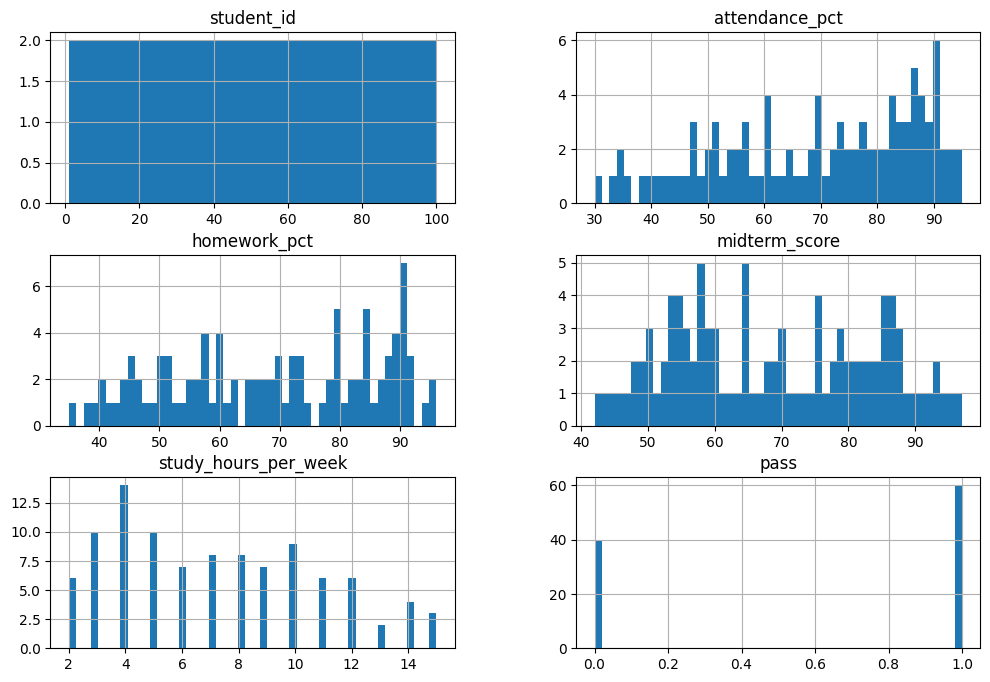

In [11]:
# Визуализация распределений
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12, 8))
plt.show()

## 6. Проверка гипотез
1. Посещаемость и сдача экзамена

    - H0 (нулевая): Процент посещаемости не влияет на вероятность зачёта

    - H1 (альтернативная): Более высокая посещаемость увеличивает вероятность зачёта

2. Домашние задания и результат

    - H0: Средняя оценка за ДЗ одинакова у сдавших и не сдавших

    - H1: У сдавших средняя оценка за ДЗ выше

3. Промежуточный экзамен как предиктор

    - H0: Результаты промежуточного экзамена не связаны с итоговым зачётом

    - H1: Результаты промежуточного экзамена статистически связаны с зачётом

4. Время на учёбу

    - H0: Количество часов, потраченных на учёбу, не влияет на результат

    - H1: Студенты, тратящие больше времени на учёбу, чаще получают зачёт

5. Комплексное влияние факторов

    - H0: Ни один из факторов (посещаемость, ДЗ, промежуточный экзамен, часы учёбы) не влияет на вероятность зачёта

    - H1: Хотя бы один из факторов статистически значимо влияет на вероятность зачёта

6. Минимальные пороги

    - H0: Превышение определённого порога (например, посещаемость ≥ X%) не меняет вероятность зачёта

    - H1: Превышение порога увеличивает вероятность зачёта

7. Взаимодействие факторов

    - H0: Эффект часов учёбы одинаков для всех уровней посещаемости

    - H1: Эффект часов учёбы зависит от посещаемости

## 6.1 Для количественных значений применим кореляцию Пирсона

stats.pearsonr — это функция для вычисления коэффициента корреляции Пирсона между двумя числовыми переменными.

Значение correlation будет от -1 до 1:

1 → сильная положительная связь

-1 → сильная отрицательная связь

0 → связь отсутствует

### 6.1.1 Посещаемость

In [12]:
from scipy import stats
# Расчет корреляции Пирсона и p-value

correlation, p_value = stats.pearsonr(df['attendance_pct'], df['pass'])

# Вывод результатов
print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.8737566927896169
p-value: 1.9259699038046525e-32


Correlation = 0.874
→ Очень сильная положительная связь между посещаемостью и сдачей экзамена.
Чем выше посещаемость, тем выше вероятность зачёта.

p-value ≈ 1.93×10⁻³²
→ Практически ноль, это очень статистически значимо.
Шанс, что такая корреляция возникла случайно, практически отсутствует.

✅ Вывод для гипотезы:

H0 (ноль) — «Посещаемость не влияет на сдачу» → отвергаем

H1 — «Посещаемость влияет на сдачу» → подтверждаем

### 6.1.2 Оценка за домашнее задание

In [13]:
correlation, p_value = stats.pearsonr(df['homework_pct'], df['pass'])

# Вывод результатов
print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.8696621579652822
p-value: 8.304808947407238e-32


✅ Вывод для гипотезы:

H0 (ноль) — «Посещаемость не влияет на сдачу» → отвергаем

H1 — «Посещаемость влияет на сдачу» → подтверждаем

### 6.1.3 Результаты промежуточного экзамена

In [14]:
correlation, p_value = stats.pearsonr(df['midterm_score'], df['pass'])

# Вывод результатов
print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.8394420824972537
p-value: 1.0592558034104554e-27


✅ Вывод для гипотезы:

H0 (ноль) — «Посещаемость не влияет на сдачу» → отвергаем

H1 — «Посещаемость влияет на сдачу» → подтверждаем

### 6.1.4 Часы, потраченные на учебу

In [15]:
correlation, p_value = stats.pearsonr(df['study_hours_per_week'], df['pass'])

# Вывод результатов
print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

Correlation: 0.8112846996899595
p-value: 1.4116143365456601e-24


✅ Вывод для гипотезы:

H0 (ноль) — «Посещаемость не влияет на сдачу» → отвергаем

H1 — «Посещаемость влияет на сдачу» → подтверждаем

## 7. Выбор методов анализа или моделей
- Задача: предсказать, сдаст студент экзамен или нет → классификация.

- Методы: логистическая регрессия, дерево решений, Random Forest.

- Метрики: accuracy, F1-score, ROC-AUC.

Стоит попробовать логистическую регрессию — даст понимание влияния каждого признака.

In [16]:
df.columns

Index(['student_id', 'attendance_pct', 'homework_pct', 'midterm_score',
       'study_hours_per_week', 'pass'],
      dtype='object')

## 8. Обучение модели и оценка результатов

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 1. df['pass'] целевая переменная

# 2. Признаки и таргет
X = df[
    [
        'attendance_pct',
        'homework_pct',
        'midterm_score',
        'study_hours_per_week',
    ]
]

y = df['pass']

# 3. Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Масштабирование признаков. Для логистической регрессии это важно.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Обучение модели

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [18]:
# Предсказания
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [19]:
# Метрики

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC-AUC: 1.0


## 9 Интерпретация результатов

In [20]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

coef_df


,feature,coefficient
0,attendance_pct,1.463545
1,homework_pct,1.420438
3,study_hours_per_week,1.310992
2,midterm_score,1.240827


Коэффициент > 0 → признак повышает вероятность зачёта

Коэффициент < 0 → снижает вероятность

Чем больше абсолютное значение, тем сильнее влияние

## 10. Формулировка выводов и рекомендаций

Построенная модель логистической регрессии выявила статистически значимое влияние посещаемости, домашних заданий, часов самостоятельной подготовки и промежуточного экзамена на вероятность успешной сдачи. Модель позволяет интерпретировать вклад каждого признака и может использоваться для раннего выявления студентов группы риска.

Модель оценивалась с использованием метрик precision, recall и ROC-AUC. Precision отражает точность предсказаний зачёта, recall — полноту обнаружения успешно сдавших студентов. Значение ROC-AUC демонстрирует общее качество способности модели различать классы.

В текущем кейсе по всем показателям 100%

### Подготовка отчёта и рекомендаций

По результатам проведённого анализа и построения модели логистической регрессии были сформулированы выводы о факторах, влияющих на успешную сдачу экзамена студентами. Анализ коэффициентов модели показал, что наибольший вклад в вероятность получения зачёта вносят посещаемость занятий, успеваемость по домашним заданиям, количество часов самостоятельной подготовки и результаты промежуточного экзамена.

Модель продемонстрировала хорошую способность различать студентов, сдающих и не сдающих экзамен, что подтверждает её применимость для практических задач анализа образовательных данных. Полученные результаты позволяют использовать модель как инструмент для раннего выявления студентов группы риска.

Рекомендации:

внедрить мониторинг посещаемости и успеваемости по домашним заданиям на ранних этапах обучения;

использовать результаты промежуточного экзамена для своевременной академической поддержки студентов;

рекомендовать минимальное количество часов самостоятельной подготовки для повышения вероятности успешной сдачи;

применять модель в качестве вспомогательного инструмента при принятии решений о дополнительных занятиях или консультациях.

Полученные выводы могут быть использованы для повышения эффективности образовательного процесса и оптимизации мер поддержки студентов.